In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve as prc
from scikitplot.metrics import plot_lift_curve as plc
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('../input/heart.csv')

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fast_bs', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'n_major_vessels', 'thalassemia', 'diagnose']

In [5]:
data = data[data.thalassemia != 0]

In [6]:
sex = { 0:'Female', 1:'Male'}
cp = {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain', 3:'Asymptomatic'}
fbs = { 0:'<120mg/dl', 1:'>120mg/dl'}
ecg = {0 : 'Normal', 1:'ST-T', 2:'Left Ventricular Hypertrophy'}
ex = { 0:'no', 1:'yes'}
st_slope = {0:'Upsloping', 1:'Flat', 2:'Downsloping'}
thal = {1:'Normal', 2:'Fixed Defect', 3:'Reversable Defect'}

In [7]:
data['sex'] = [sex[i] for i in data.sex]
data['chest_pain'] = [cp[i] for i in data.chest_pain]
data['fast_bs'] = [fbs[i] for i in data.fast_bs]
data['rest_ecg'] = [ecg[i] for i in data.rest_ecg]
data['exercise_induced_angina'] = [ex[i] for i in data.exercise_induced_angina]
data['st_slope'] = [st_slope[i] for i in data.st_slope]
data['thalassemia'] = [thal[i] for i in data.thalassemia]

In [8]:
data['sex'] = data['sex'].astype('category')
data['chest_pain'] = data['chest_pain'].astype('category')
data['fast_bs'] = data['fast_bs'].astype('category')
data['rest_ecg'] = data['rest_ecg'].astype('category')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('category')
data['st_slope'] = data['st_slope'].astype('category')
data['thalassemia'] = data['thalassemia'].astype('category')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


80% Percentile of heart disease suspected patients' age :  [41.  65.7]


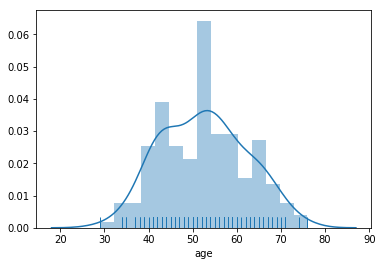

In [9]:
suspected = data[data['diagnose'] == 1]
sns.distplot(suspected.age, bins=15, rug=True)
print("80% Percentile of heart disease suspected patients' age : ", np.percentile(suspected.age, [10,90]))

80% Percentile of heart disease suspected patients' rest blood pressure :  [110. 150.]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


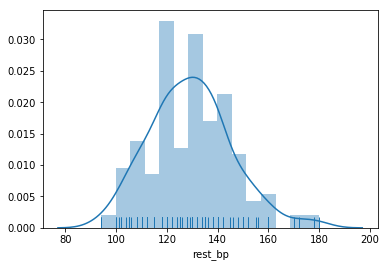

In [10]:
suspected = data[data['diagnose'] == 1]
sns.distplot(suspected.rest_bp, bins=15, rug=True)
print("80% Percentile of heart disease suspected patients' rest blood pressure : ", np.percentile(suspected.rest_bp, [10,90]))

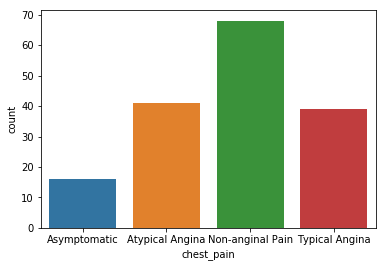

In [11]:
sns.countplot(suspected.chest_pain)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


80% Percentile of heart disease suspected patients' cholesterol :  [192.  305.4]


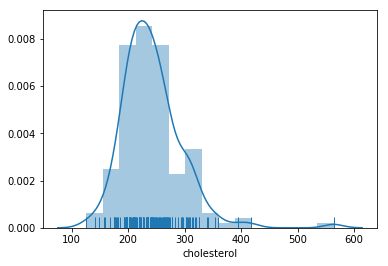

In [12]:
suspected = data[data['diagnose'] == 1]
sns.distplot(suspected.cholesterol, bins=15, rug=True)
print("80% Percentile of heart disease suspected patients' cholesterol : ", np.percentile(suspected.cholesterol, [10,90]))

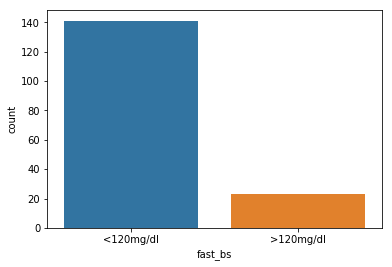

In [13]:
sns.countplot(suspected.fast_bs)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


80% Percentile of heart disease suspected patients' maximum heart rate :  [131.3 179.7]


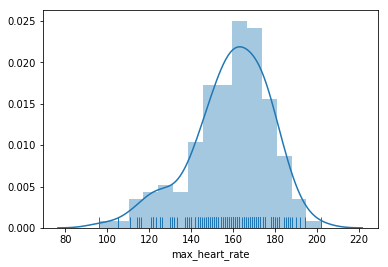

In [14]:
suspected = data[data['diagnose'] == 1]
sns.distplot(suspected.max_heart_rate, bins=15, rug=True)
print("80% Percentile of heart disease suspected patients' maximum heart rate : ", np.percentile(suspected.max_heart_rate, [10,90]))

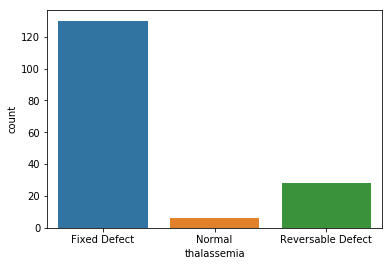

In [15]:
sns.countplot(suspected.thalassemia)

In [16]:
data = pd.get_dummies(data, drop_first=True)
data.head(10)

,age,rest_bp,cholesterol,max_heart_rate,st_depression,n_major_vessels,diagnose,sex_Male,chest_pain_Atypical Angina,chest_pain_Non-anginal Pain,chest_pain_Typical Angina,fast_bs_>120mg/dl,rest_ecg_Normal,rest_ecg_ST-T,exercise_induced_angina_yes,st_slope_Flat,st_slope_Upsloping,thalassemia_Normal,thalassemia_Reversable Defect
0,63,145,233,150,2.3,0,1,1,0,0,0,1,1,0,0,0,1,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,0,1,0,0,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,0,0,1,1,0,0,0,0
5,57,140,192,148,0.4,0,1,1,0,0,1,0,0,1,0,1,0,1,0
6,56,140,294,153,1.3,0,1,0,1,0,0,0,1,0,0,1,0,0,0
7,44,120,263,173,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,1
8,52,172,199,162,0.5,0,1,1,0,1,0,1,0,1,0,0,0,0,1
9,57,150,168,174,1.6,0,1,1,0,1,0,0,0,1,0,0,0,0,0


In [17]:
y = data[['diagnose']]
X = data.drop('diagnose',axis=1)

In [18]:
lr = LogisticRegression()
def cv_score(variables, X, y):
    cv_scores = cross_val_score(lr, X[variables], y, cv=10, scoring='roc_auc')
    cv_scores = cv_scores.mean()
    return(cv_scores)
    
def sel_var(candidate_variables, X, y):
    best_auc = 0
    best_var = []
    for v in candidate_variables:
        auc_var = cv_score(best_var + [v], X, y)
        if auc_var > best_auc:
            best_auc = auc_var
            best_var = best_var + [v]
    return best_auc, best_var
        

In [19]:
variables = X.columns.values
auc, var = sel_var(variables, X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:43

In [20]:
print(auc)
print(var)

0.9115627020038785
['age', 'max_heart_rate', 'st_depression', 'n_major_vessels', 'sex_Male', 'chest_pain_Atypical Angina', 'chest_pain_Non-anginal Pain', 'chest_pain_Typical Angina', 'rest_ecg_Normal', 'exercise_induced_angina_yes', 'st_slope_Flat', 'thalassemia_Reversable Defect']


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


              precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.96      0.76      0.85        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.88      0.85      0.85        61



/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


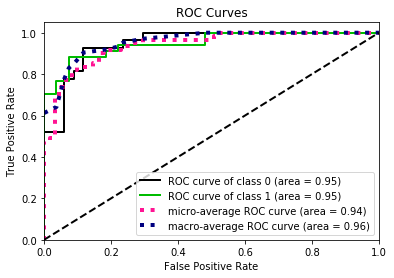

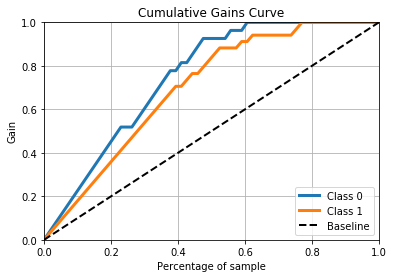

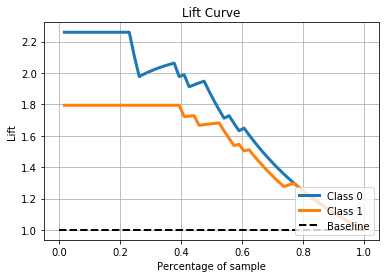

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[var], y, test_size=0.2)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
y_pred_bin = lr.predict(X_test)
prc(y_test, y_pred)
pcg(y_test, y_pred)
plc(y_test, y_pred)
print(classification_report(y_test, y_pred_bin))